In [1]:
import CalculatedFieldSubroutines as cfs

#

import numpy as np

import pandas as pd

#

import matplotlib.pyplot as plt

from pandasgui import show

import plotly.express as px

#

import warnings

In [2]:
warnings.filterwarnings( 'ignore' )

In [3]:
gmID_list = cfs.list_whitelisted_gmIDs()

In [4]:
topic_list = cfs.list_topics()

print( topic_list )

['/apollo/canbus/chassis', '/apollo/drive/event', '/apollo/sensor/gnss/best/pose', '/apollo/perception/traffic/light']


In [5]:
red_route_best_pose_df_list = []

green_route_best_pose_df_list = []

blue_route_best_pose_df_list = []

for gmID in gmID_list:

    current_gmID_best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )

    current_gmID_best_pose_df = current_gmID_best_pose_df.sort_values( 'time' )
    
    route = cfs.give_route( gmID )
    
    if ( route == 'Red' ):

        red_route_best_pose_df_list.append( current_gmID_best_pose_df )

    elif ( route == 'Green' ):

        green_route_best_pose_df_list.append( current_gmID_best_pose_df )

    else:

        blue_route_best_pose_df_list.append( current_gmID_best_pose_df )

In [37]:
index = 10

#

example_blue_route_gmID = blue_route_best_pose_df_list[ index ][ 'groupMetadataID' ][ 0 ]

#

example_blue_route_best_pose_df_v1 = blue_route_best_pose_df_list[ index ].copy()

cfs.NormalizedTime( example_blue_route_best_pose_df_v1 )

reference_blue_route_best_pose_df = cfs.retrieve_gmID_topic( '3d2a80f0-ec81-11ee-b297-3b0ad9d5d6c6', '/apollo/sensor/gnss/best/pose' )

cfs.ProgressAlongRoute( example_blue_route_best_pose_df_v1, reference_blue_route_best_pose_df )

#

example_blue_route_best_pose_df_v2 = blue_route_best_pose_df_list[ index ].copy()

cfs.NormalizedTime( example_blue_route_best_pose_df_v2 )

cfs.ProgressAlongRoute_v2( example_blue_route_best_pose_df_v2 )

False

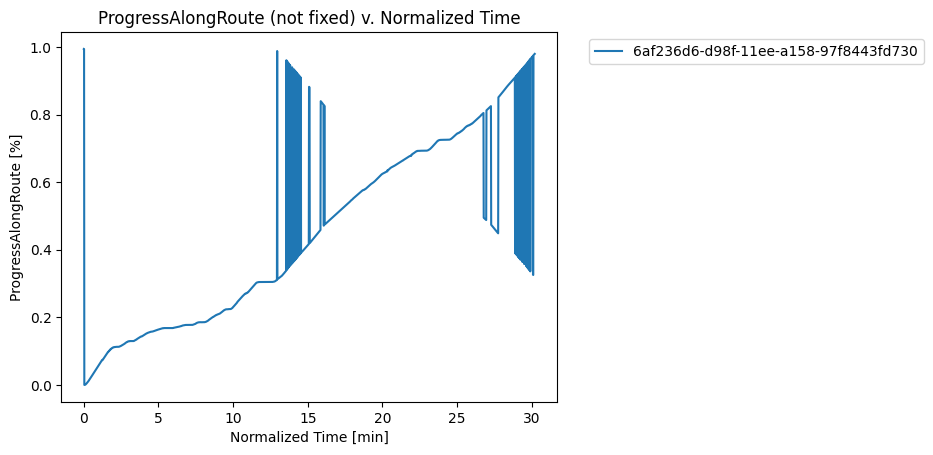

In [40]:
plt.plot( example_blue_route_best_pose_df_v1[ 'NormalizedTime' ] * 1.66667e-11, 
          example_blue_route_best_pose_df_v1[ 'ProgressAlongRoute' ],
          label = example_blue_route_gmID )

plt.title( 'ProgressAlongRoute (not fixed) v. Normalized Time' )

plt.xlabel( 'Normalized Time [min]' )

plt.ylabel( 'ProgressAlongRoute [%]' )

plt.legend( bbox_to_anchor = ( 1.05, 1.0 ), loc = 'upper left' )

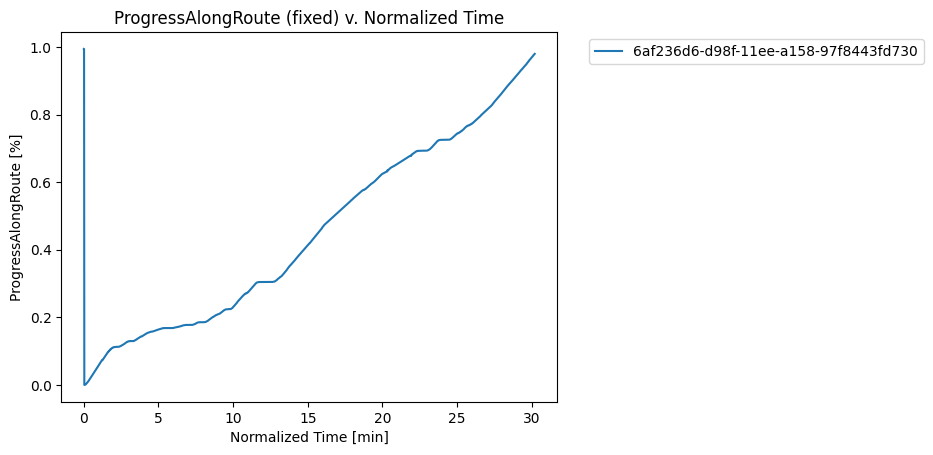

In [41]:
plt.plot( example_blue_route_best_pose_df_v2[ 'NormalizedTime' ] * 1.66667e-11, 
          example_blue_route_best_pose_df_v2[ 'ProgressAlongRoute' ],
          label = example_blue_route_gmID )

plt.title( 'ProgressAlongRoute (fixed) v. Normalized Time' )

plt.xlabel( 'Normalized Time [min]' )

plt.ylabel( 'ProgressAlongRoute [%]' )

plt.legend( bbox_to_anchor = ( 1.05, 1.0 ), loc = 'upper left' )